In [4]:
import pandas as pd
from dbfread import DBF
import seaborn as sns
import matplotlib.pyplot as plt

area = 277

# Specify the path to your DBF file
dbf_file_path = f'E:/ArcticDEM/Imagery/21_38/{area}/jump_{area}_Points.dbf'

# Create an empty list to store rows from the DBF file
data = []

# Open the DBF file and read its records
with DBF(dbf_file_path, load=True) as dbf:
    for record in dbf:
        data.append(record)

# Create a DataFrame from the data
df = pd.DataFrame(data)

df = df.rename(columns={'grid_code': 'jump', 'RASTERVALU': 'date'})

df

,pointid,jump,date,POINT_X,POINT_Y
0,1,-1.15759,20160516,-256625.0,-1988395.0
1,2,-1.07537,20160516,-256635.0,-1988405.0
2,3,-1.19121,20160516,-256625.0,-1988405.0
3,4,-1.10518,20160516,-256615.0,-1988405.0
4,5,-1.05336,20160516,-256605.0,-1988405.0
...,...,...,...,...,...
7568,7569,-10.16650,20160516,-256255.0,-1989545.0
7569,7570,-1.18085,20160429,-256125.0,-1989545.0
7570,7571,-3.90590,20170605,-256115.0,-1989545.0
7571,7572,-5.90693,20170605,-256105.0,-1989545.0


In [13]:
uniquedates = sorted(df['date'].unique())
uniquedates

[20080604,
 20130524,
 20131012,
 20140527,
 20140531,
 20150512,
 20150513,
 20160429,
 20160516,
 20170605,
 20180706,
 20180719,
 20190523,
 20190524,
 20200227]

In [16]:
df[df['date']==uniquedates[9]]

,pointid,jump,date,POINT_X,POINT_Y
50,51,-3.23088,20170605,-256385.0,-1988455.0
84,85,-3.22449,20170605,-256415.0,-1988465.0
85,86,-4.40358,20170605,-256405.0,-1988465.0
86,87,-5.97701,20170605,-256395.0,-1988465.0
87,88,-7.51216,20170605,-256385.0,-1988465.0
...,...,...,...,...,...
7561,7562,-5.46529,20170605,-256085.0,-1989535.0
7562,7563,-2.82852,20170605,-256075.0,-1989535.0
7570,7571,-3.90590,20170605,-256115.0,-1989545.0
7571,7572,-5.90693,20170605,-256105.0,-1989545.0


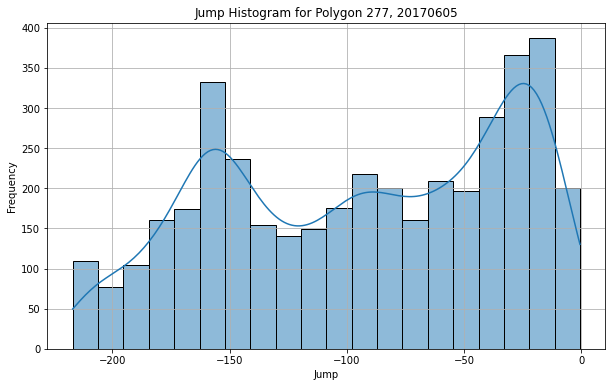

In [17]:
# Create a histogram plot 
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['date']==uniquedates[9]], x='jump', bins=20, kde=True)  # Adjust the number of bins as needed
plt.title(f'Jump Histogram for Polygon {area}, {uniquedates[9]}')
plt.xlabel('Jump')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
for uniquedate in uniquedates:
    dataframe = df[df['date']==uniquedate]
    print(dataframe['jump'].count())

2
3
89
2
27
71
47
1194
1945
4043
11
21
32
83
3


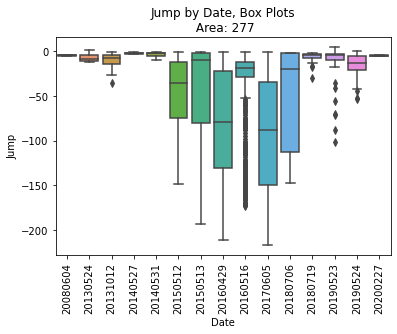

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='date', y='jump', data=df)
plt.ylabel('Jump')
plt.xlabel('Date')
plt.title(f'Jump by Date, Box Plots\n Area: {area}')
plt.xticks(rotation=90)
plt.show()

In [28]:
def calculate_normalized_frequency(df, bin_size, min_value, max_value):
    # Create bins using numpy
    bins = np.arange(min_value, max_value + bin_size, bin_size)

    # Calculate the frequency distribution using pandas cut
    frequency_distribution = pd.cut(df['jump'], bins=bins, include_lowest=True).value_counts().sort_index()

    # Normalize the frequencies by the number of rows
    normalized_frequencies = frequency_distribution / len(df)

    # Extract the upper bound of each bin
    bin_upper_bounds = [interval.right for interval in normalized_frequencies.index]

    return bin_upper_bounds, normalized_frequencies

In [32]:
min_val = min(df['jump'])
max_val = max(df['jump'])

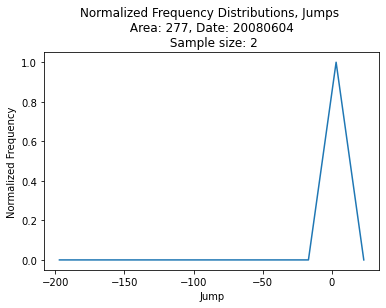

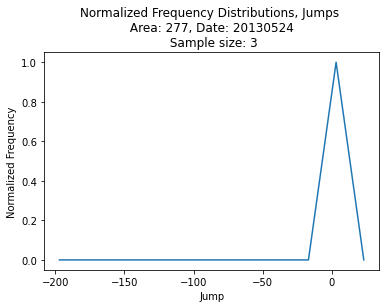

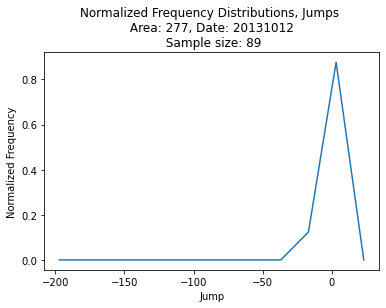

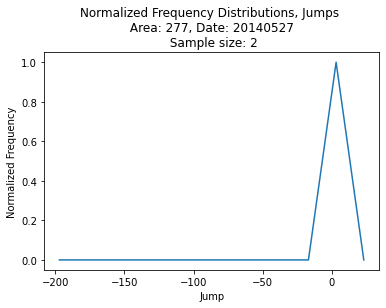

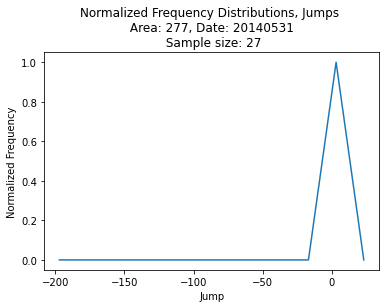

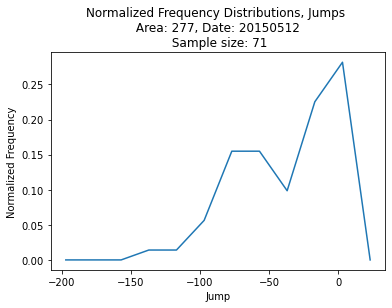

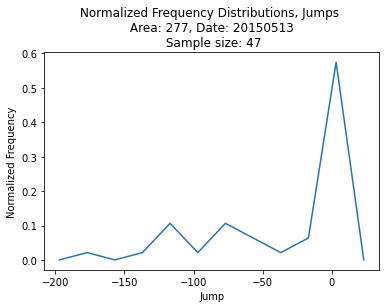

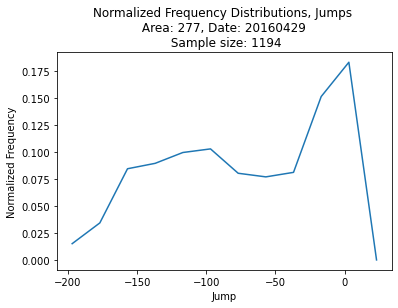

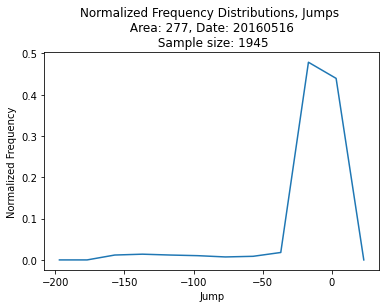

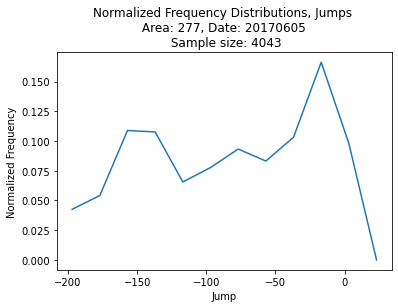

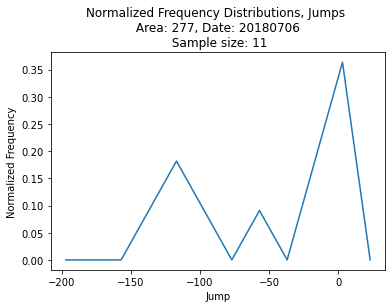

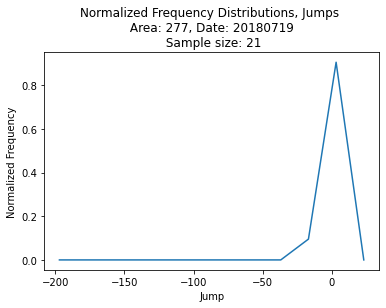

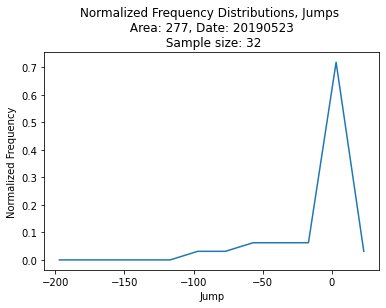

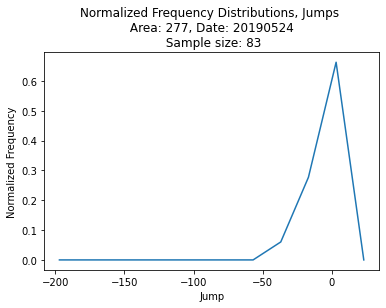

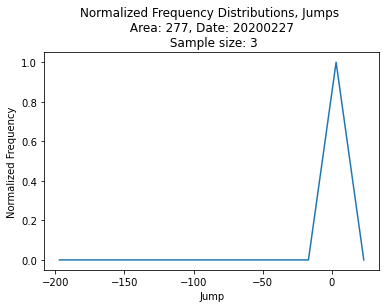

In [60]:
for uniquedate in uniquedates:
    dataframe = df[df['date']==uniquedate]
    n = dataframe['jump'].count()
    bin_upper_bounds, normalized_frequencies = calculate_normalized_frequency(dataframe, bin_size=20, min_value=min_val, max_value=max_val)
    plt.plot(bin_upper_bounds, normalized_frequencies, label=label)
    plt.xlabel('Jump')
    plt.ylabel('Normalized Frequency')
    plt.title(f'Normalized Frequency Distributions, Jumps \n Area: {area}, Date: {uniquedate} \n Sample size: {n}')
    plt.show()
    
    

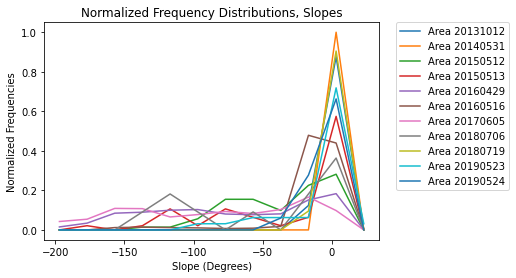

In [64]:
# Lists to store data for plotting
original_date = []
all_bin_upper_bounds = []
all_normalized_frequencies = []
distributions = []
jump_data = []


# Iterate over dates
for uniquedate in uniquedates:
   
    # Calculate normalized frequencies and get upper bounds
    dataframe = df[df['date']==uniquedate]
    n = dataframe['jump'].count()
    if n>10:   # Filter dates with fewer than 10 samples
        bin_upper_bounds, normalized_frequencies = calculate_normalized_frequency(dataframe, bin_size=20, min_value=min_val, max_value=max_val)
        distribution = normalized_frequencies.reset_index()['jump'].to_numpy()
        
        # Append the data to the lists
        original_date.append(uniquedate)
        all_bin_upper_bounds.append(bin_upper_bounds)
        all_normalized_frequencies.append(normalized_frequencies)
        distributions.append(distribution)
        jump_data.append(df[df['date']==uniquedate]['jump'].to_numpy())

            
# Plot the normalized frequencies for all areas on the same plot
for i, (bin_upper_bounds, normalized_frequencies) in enumerate(zip(all_bin_upper_bounds, all_normalized_frequencies)):
    label = f'Area {original_date[i]}'  # Add a label for each area
    plt.plot(bin_upper_bounds, normalized_frequencies, label=label)

plt.xlabel('Slope (Degrees)')
plt.ylabel('Normalized Frequencies')
plt.title('Normalized Frequency Distributions, Slopes')
plt.legend()  # Add a legend to distinguish areas
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

In [93]:
#known_landslide_index = original_date.index('20170605')
diff = []
for i in range(len(distributions)):
    Sum_Abs_Diff = sum(abs(distributions[i] - distributions[6]))
    diff.append(Sum_Abs_Diff)

# Convert to dataframe and attach original FID
diff_df = pd.DataFrame(diff)
diff_df = diff_df.rename(columns={0: 'diff'})
diff_df['Original_FID'] = original_date

In [131]:
from sklearn import svm

## Classify using cumulative percentage of area differences

# Calculate cumulative percentage of area difference
diff_df_sorted = diff_df.sort_values(by='diff', ascending=True)
diff_total = sum(diff)
diff_df_sorted['cumsum'] = diff_df_sorted['diff'].cumsum()
diff_df_sorted['cumsum_perc'] = diff_df_sorted['cumsum']/diff_total

# Assign 0 to rows where cumsum_perc is less than or equal to 0.25
diff_df_sorted.loc[diff_df_sorted['cumsum_perc'] <= 0.25, 'class'] = 0

# Assign 1 to rows where cumsum_perc is greater than 0.25 and less than or equal to 0.75
diff_df_sorted.loc[(0.25 < diff_df_sorted['cumsum_perc']) & (diff_df_sorted['cumsum_perc'] <= 0.75), 'class'] = 1

# Assign -1 to rows where cumsum_perc is greater than 0.75
diff_df_sorted.loc[0.75 < diff_df_sorted['cumsum_perc'], 'class'] = -1

X = []
Y = []


# Populate the data set
for i, (normalized_frequencies) in enumerate(all_normalized_frequencies):
    X.append(normalized_frequencies.to_numpy())
    Y.append(int(diff_df_sorted['class'][i]))

# Define the desired sampling percentage (30%)
#sampling_percentage = 0.30

# Calculate the number of elements to sample
#num_samples = roundup(len(indices) * sampling_percentage, 0)   # this is a placeholder and probably won't work
num_samples = 6

# Randomly sample elements
index_list = diff_df['Original_FID'].tolist()
sampled_indices = np.random.choice(index_list, size=num_samples, replace=False)


In [135]:
dummy_df = diff_df_sorted[diff_df_sorted['Original_FID'].isin(sampled_indices)]
while sum(dummy_df['class']==1)==sum(dummy_df['class']==-1)==sum(dummy_df['class']==0) is False:
    sampled_indices = np.random.choice(index_list, size=num_samples, replace=False)
    dummy_df = diff_df_sorted[diff_df_sorted['Original_FID'].isin(sampled_indices)]
dummy_df = diff_df_sorted[diff_df_sorted['Original_FID'].isin(sampled_indices)]

In [138]:
X_train = []
Y_train = []
    
# Populate the data set
for i, (normalized_frequencies) in enumerate(all_normalized_frequencies):
    if i in dummy_df.index:
        #print(normalized_frequencies)
        X_train.append(normalized_frequencies.to_numpy())
        Y_train.append(int(diff_df_sorted['class'][i]))

In [139]:
# Run SVC on traning set
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [141]:
# Classify the dataset
n = 0
N = 0
for i, (normalized_frequencies) in enumerate(all_normalized_frequencies):
    if i not in dummy_df.index:
        print(index_list[i], clf.predict([normalized_frequencies.to_numpy()])[0])
        N = N + 1
        if Y[i] == clf.predict([normalized_frequencies.to_numpy()])[0]:
            n = n + 1
            
print(f'{n/N} correct')

20150512 0
20150513 1
20160516 1
20180706 0
20190523 1
0.8 correct


In [142]:
# Classify the dataset
for i, (normalized_frequencies) in enumerate(all_normalized_frequencies):
    print(original_date[i], clf.predict([normalized_frequencies.to_numpy()])[0], int(diff_df_sorted['class'][i]))

20131012 -1 1
20140531 -1 -1
20150512 0 0
20150513 1 0
20160429 0 0
20160516 1 1
20170605 0 0
20180706 0 0
20180719 -1 -1
20190523 1 1
20190524 1 1


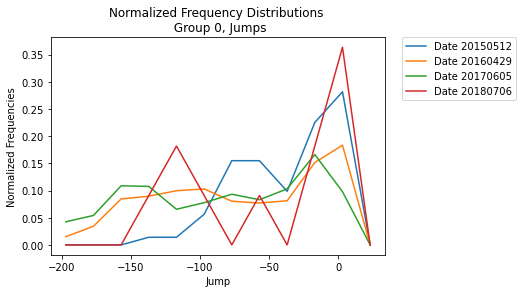

In [144]:
# Plot the normalized frequencies for all areas on the same plot
for i, (bin_upper_bounds, normalized_frequencies) in enumerate(zip(all_bin_upper_bounds, all_normalized_frequencies)):
    if abs(clf.predict([normalized_frequencies.to_numpy()])[0]) == 0:
        label = f'Date {original_date[i]}'  # Add a label for each area
        plt.plot(bin_upper_bounds, normalized_frequencies, label=label)

plt.xlabel('Jump')
plt.ylabel('Normalized Frequencies')
plt.title('Normalized Frequency Distributions \n Group 0, Jumps')
plt.legend()  # Add a legend to distinguish areas
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

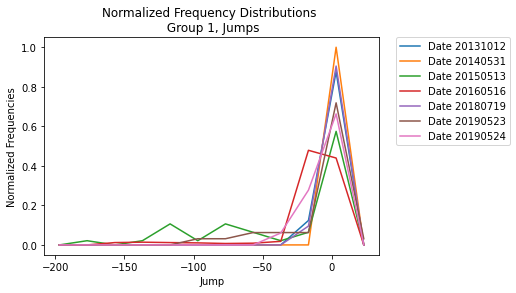

In [145]:
# Plot the normalized frequencies for all areas on the same plot
for i, (bin_upper_bounds, normalized_frequencies) in enumerate(zip(all_bin_upper_bounds, all_normalized_frequencies)):
    if abs(clf.predict([normalized_frequencies.to_numpy()])[0]) == 1:
        label = f'Date {original_date[i]}'  # Add a label for each area
        plt.plot(bin_upper_bounds, normalized_frequencies, label=label)

plt.xlabel('Jump')
plt.ylabel('Normalized Frequencies')
plt.title('Normalized Frequency Distributions \n Group 1, Jumps')
plt.legend()  # Add a legend to distinguish areas
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()